# WEEK 0 Project on Togo dataset


## Importing the datas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from windrose import WindroseAxes


## Read the data 


In [7]:
# NOTE: u should use the full path 
data = pd.read_csv(r"C:\Users\doff n\Desktop\doffneri\week0\src\data\togo-dapaong_qc.csv")

In [8]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [9]:
data.shape

(525600, 19)

In [10]:

data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [11]:
print(data.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


## Missing Values

In [12]:
print(data.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


# Check for negative values in GHI, DNI, and DHI

In [13]:
for col in ['GHI', 'DNI', 'DHI']:
    neg_count = (data[col] < 0).sum()
    print(f"Negative values in {col}: {neg_count}")

Negative values in GHI: 257385
Negative values in DNI: 0
Negative values in DHI: 0


## Basic statistics to spot potential issues

In [14]:
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.

## Define function to detect outliers

In [15]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'BP']

for col in columns_to_check:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[col].describe())


Outliers in GHI: 1303
count    1303.000000
mean     1169.943208
std        53.349756
min      1110.000000
25%      1128.000000
50%      1157.000000
75%      1194.000000
max      1424.000000
Name: GHI, dtype: float64

Outliers in DNI: 50586
count    50586.000000
mean       734.443729
std         79.216223
min        616.100000
25%        666.700000
50%        724.200000
75%        791.800000
max       1004.500000
Name: DNI, dtype: float64

Outliers in DHI: 7905
count    7905.000000
mean      587.580139
std        38.490701
min       539.300000
25%       556.300000
50%       578.600000
75%       609.800000
max       805.700000
Name: DHI, dtype: float64

Outliers in ModA: 1237
count    1237.000000
mean     1113.553840
std        51.308092
min      1056.600000
25%      1073.000000
50%      1101.000000
75%      1138.000000
max      1380.000000
Name: ModA, dtype: float64

Outliers in ModB: 1537
count    1537.000000
mean     1085.759271
std        52.523351
min      1028.000000
25%      1045

## Visualize distributions to spot anomalies

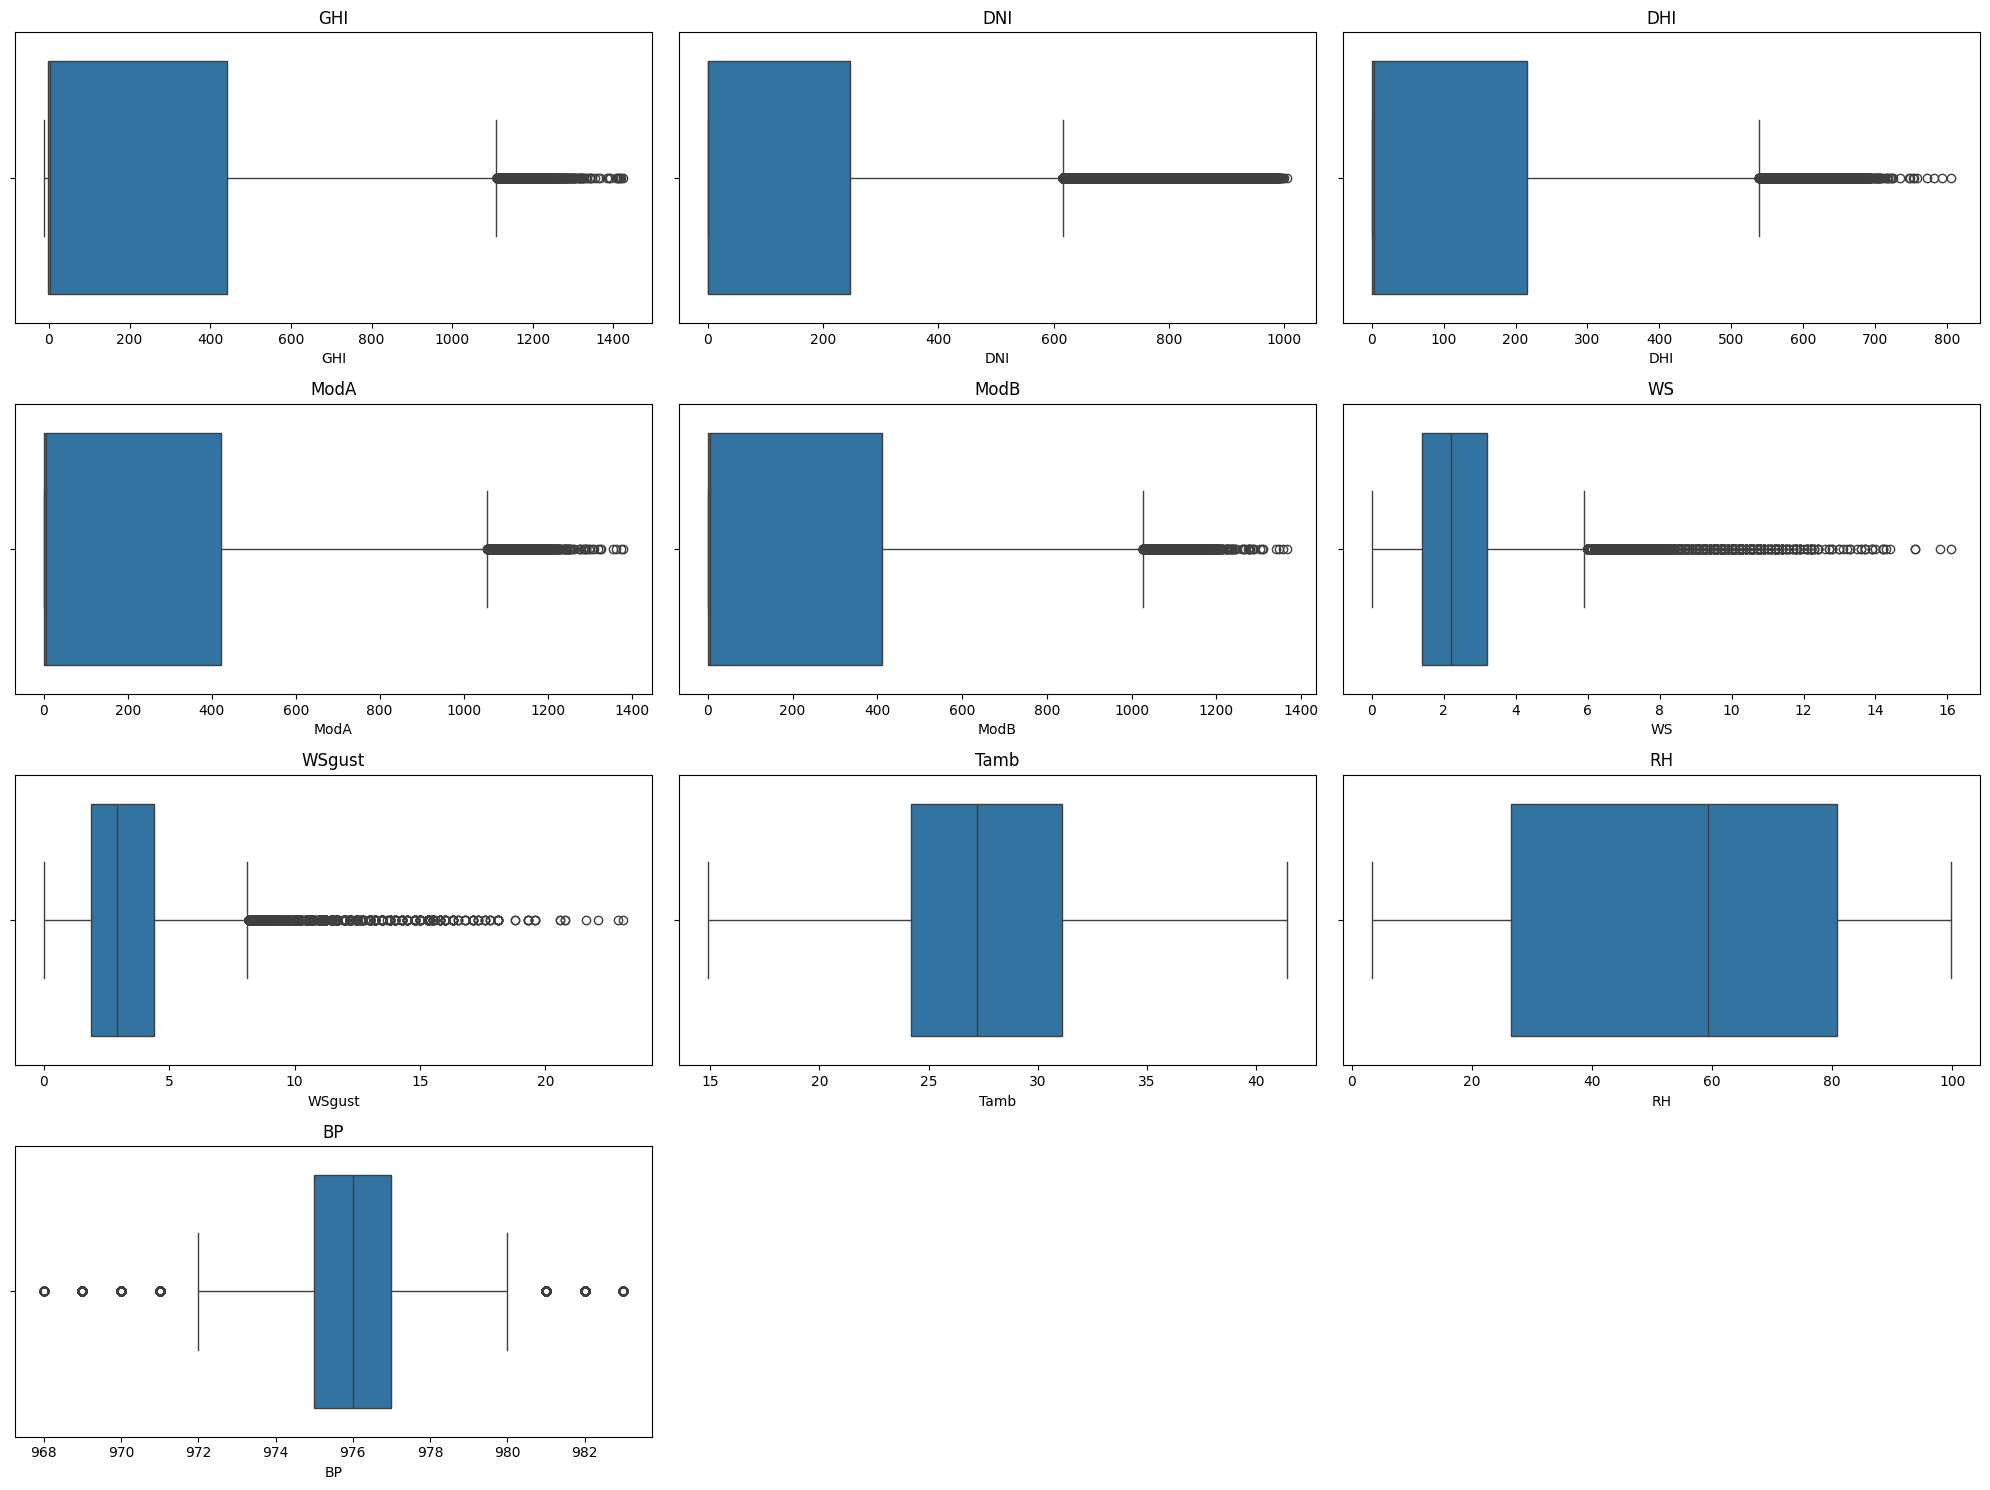

In [16]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##  Check for impossible or unlikely values

In [17]:
print("Checking for impossible or unlikely values:")
print("Negative wind speed:", (data['WS'] < 0).sum())
print("Wind speed > 100 m/s:", (data['WS'] > 100).sum())
print("GHI > 1361 W/m^2 (solar constant):", (data['GHI'] > 1361).sum())
print("Relative Humidity > 100%:", (data['RH'] > 100).sum())
print("Relative Humidity < 0%:", (data['RH'] < 0).sum())
print("Barometric Pressure < 800 hPa:", (data['BP'] < 800).sum())
print("Barometric Pressure > 1100 hPa:", (data['BP'] > 1100).sum())

Checking for impossible or unlikely values:
Negative wind speed: 0
Wind speed > 100 m/s: 0
GHI > 1361 W/m^2 (solar constant): 12
Relative Humidity > 100%: 0
Relative Humidity < 0%: 0
Barometric Pressure < 800 hPa: 0
Barometric Pressure > 1100 hPa: 0


# Check for consistency between related variables

In [18]:
print("\nChecking consistency:")
print("GHI < DNI + DHI (should be very rare):", (data['GHI'] < data['DNI'] + data['DHI']).sum())
print("ModA or ModB > GHI (should be rare):", ((data['ModA'] > data['GHI']) | (data['ModB'] > data['GHI'])).sum())


Checking consistency:
GHI < DNI + DHI (should be very rare): 456512
ModA or ModB > GHI (should be rare): 371193


## Time series continuity check

In [19]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
time_diff = data['Timestamp'].diff()
print("\nTime gaps larger than expected:")
print(time_diff[time_diff > pd.Timedelta(minutes=1)])


Time gaps larger than expected:
Series([], Name: Timestamp, dtype: timedelta64[ns])


## Check for unusual differences between ModA and ModB

In [20]:
mod_diff = abs(data['ModA'] - data['ModB'])
large_diff = mod_diff[mod_diff > 50]  # Assuming a difference > 50 is unusual
print("\nLarge differences between ModA and ModB:")
print(large_diff.describe())


Large differences between ModA and ModB:
count    11094.000000
mean        64.770858
std         14.813304
min         50.100000
25%         55.200000
50%         61.500000
75%         71.200000
max        347.700000
dtype: float64


##  Check for unusual temperature differences

In [21]:
temp_diff = abs(data['Tamb'] - data['TModA'])
large_temp_diff = temp_diff[temp_diff > 10]  # Assuming a difference > 10°C is unusual
print("\nLarge differences between Tamb and TModA:")
print(large_temp_diff.describe())


Large differences between Tamb and TModA:
count    131102.000000
mean         16.477087
std           4.695370
min          10.000000
25%          12.600000
50%          15.500000
75%          19.700000
max          40.600000
dtype: float64


## Time Series Analysis

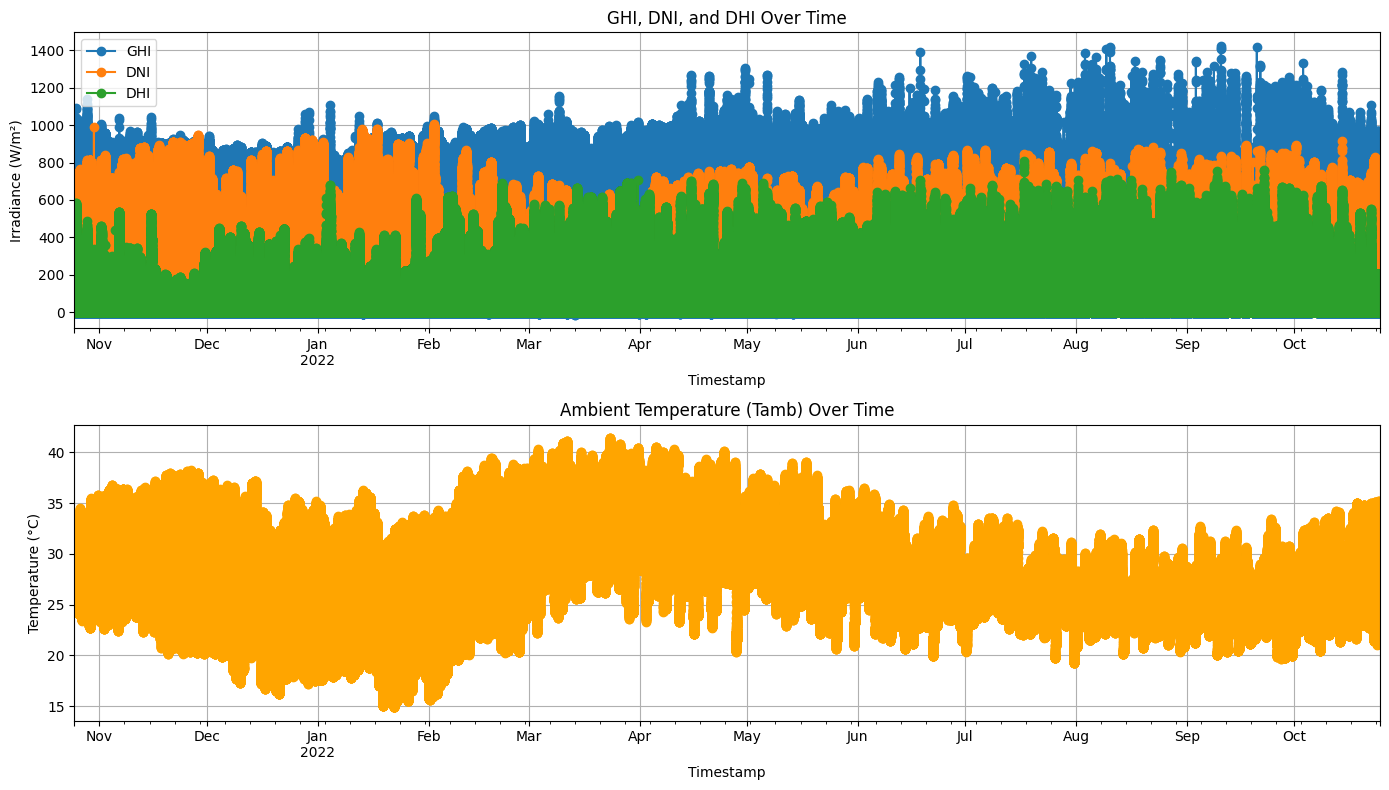

<Figure size 1000x600 with 0 Axes>

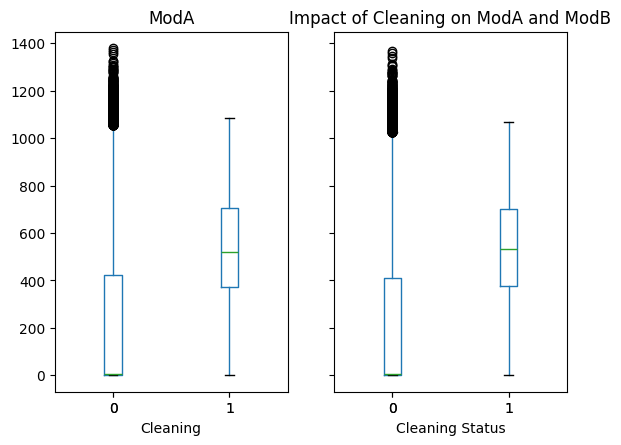

In [22]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

# Plot the time series for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))

# Plotting GHI, DNI, DHI
plt.subplot(2, 1, 1)
data[['GHI', 'DNI', 'DHI']].plot(ax=plt.gca(), marker='o')
plt.title('GHI, DNI, and DHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.grid(True)

# Plotting Tamb
plt.subplot(2, 1, 2)
data['Tamb'].plot(ax=plt.gca(), color='orange', marker='o')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Impact of Cleaning on ModA and ModB
plt.figure(figsize=(10, 6))

# Plot ModA and ModB values grouped by Cleaning status
data.boxplot(column=['ModA', 'ModB'], by='Cleaning', grid=False)
plt.suptitle('')
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Status')
plt.ylabel('Sensor Reading')
plt.show()

## Correlation Analysis

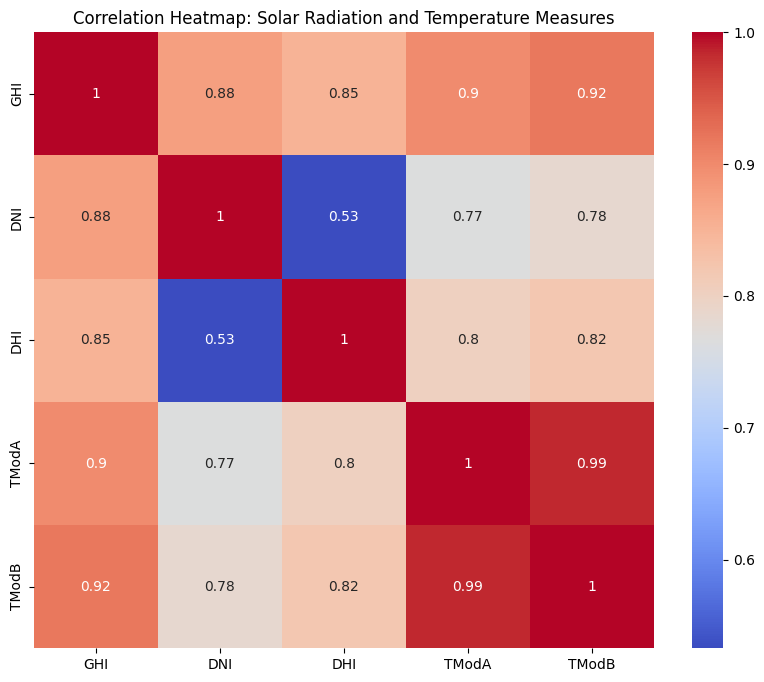

In [23]:
# Plot heatmap for correlation between GHI, DNI, DHI, TModA, and TModB
plt.figure(figsize=(10, 8))
sns.heatmap(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Solar Radiation and Temperature Measures')
plt.show()

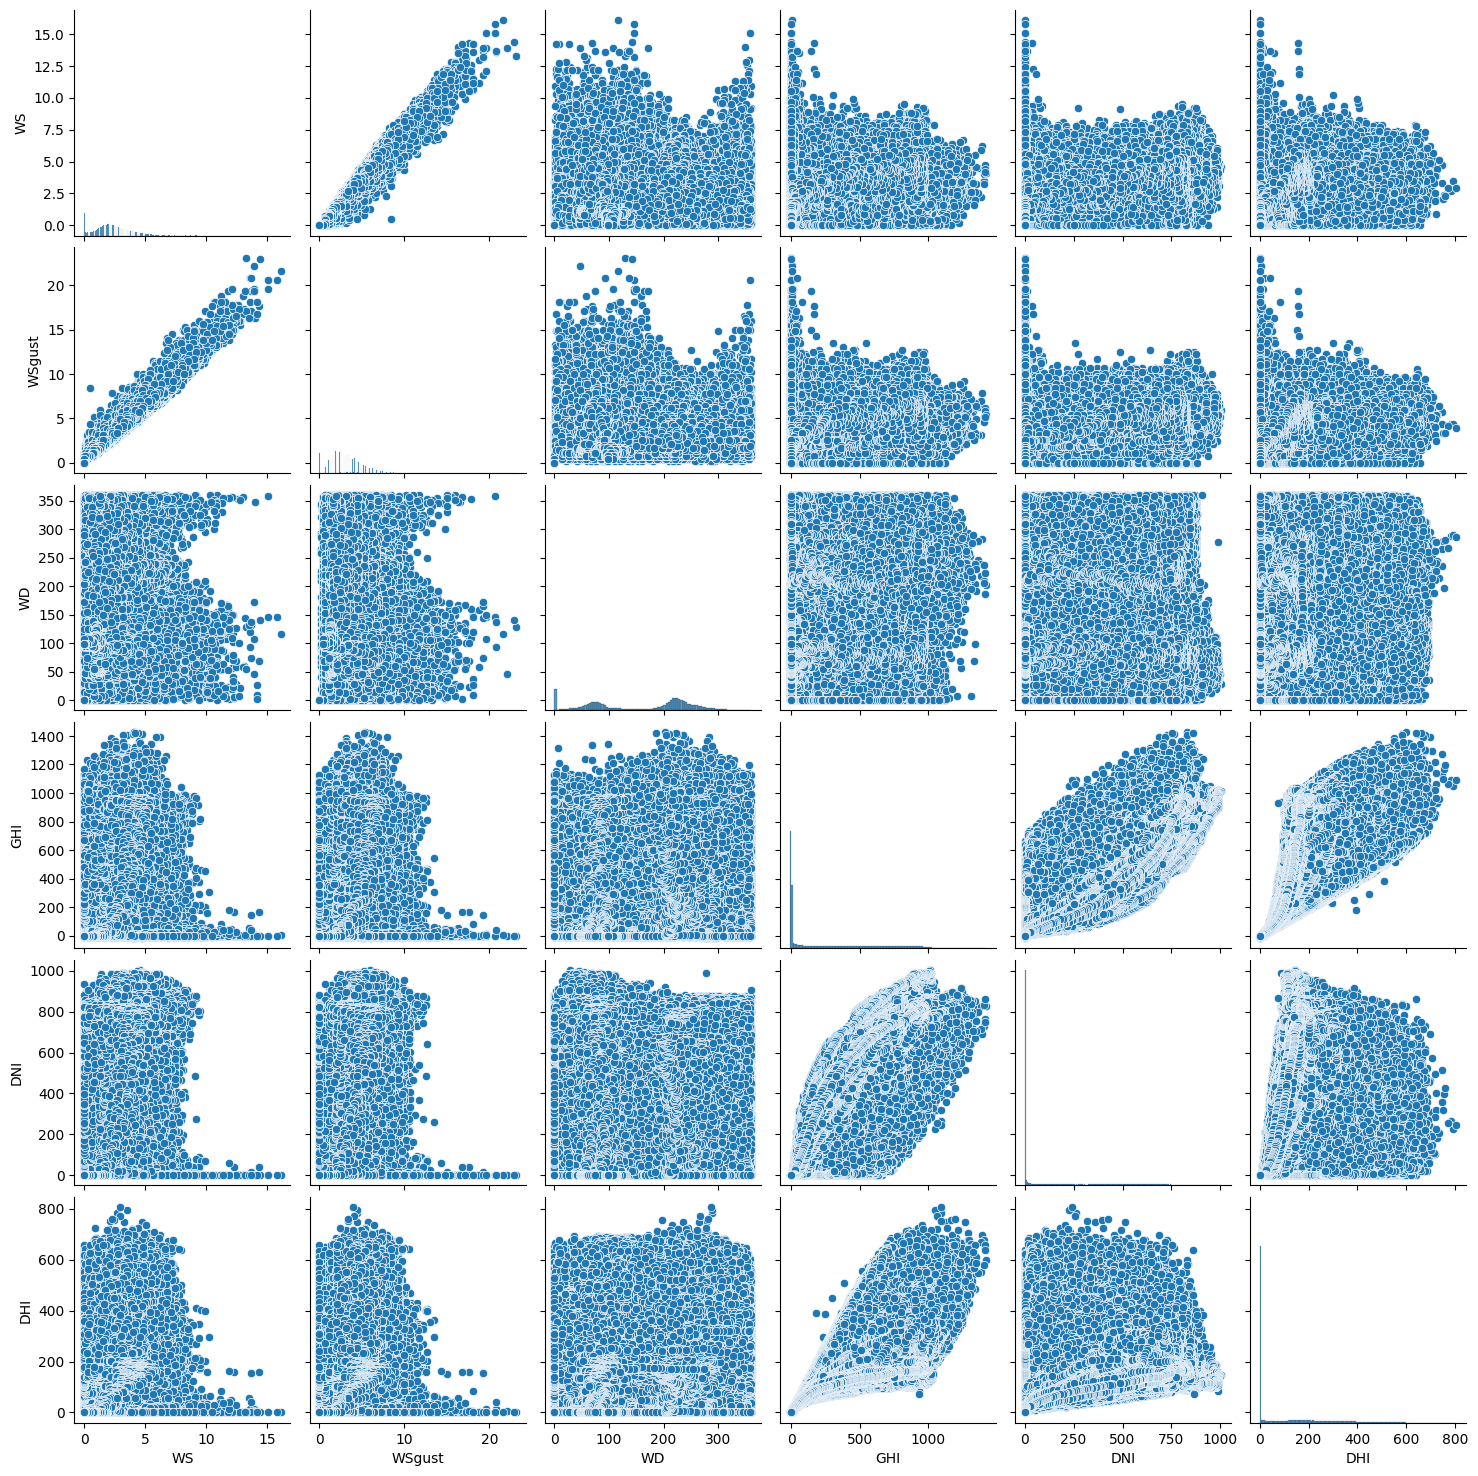

In [24]:
# Scatter plot matrix for wind conditions and solar irradiance
sns.pairplot(data[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.show()

## Wind Analysis: Polar plots

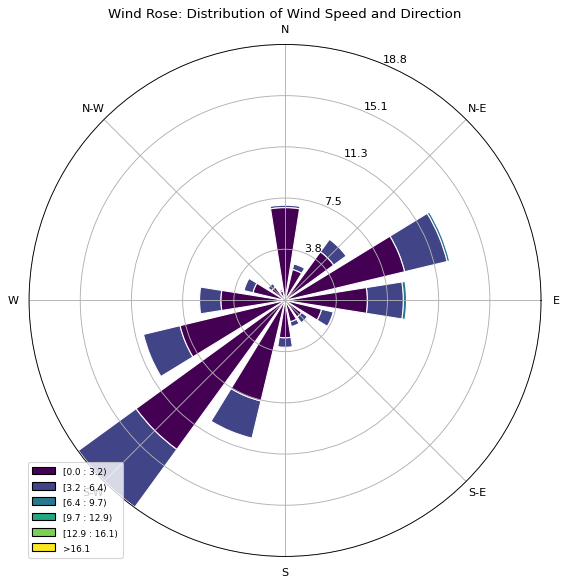

In [25]:
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Distribution of Wind Speed and Direction')
plt.show()

## Temperature Analysis: Examining the influence of RH on temperature

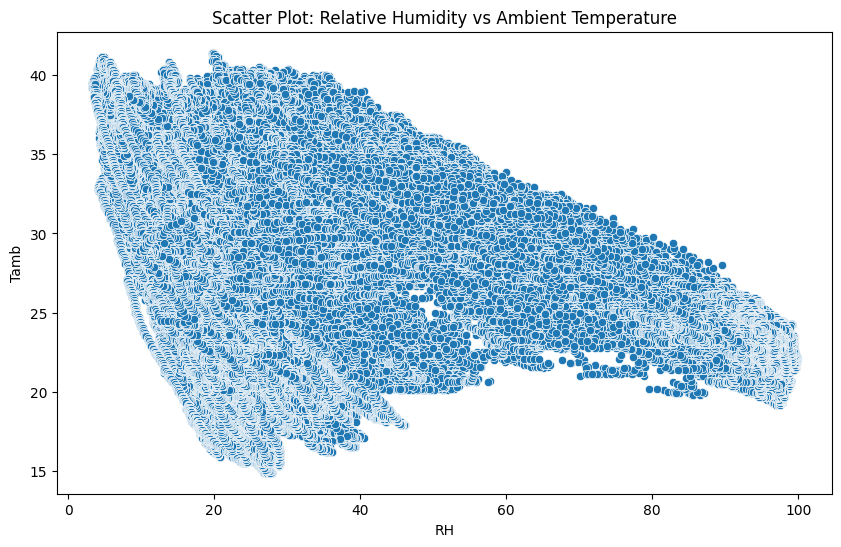

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('Scatter Plot: Relative Humidity vs Ambient Temperature')
plt.show()

## Histograms for GHI, DNI, DHI, WS, and temperatures

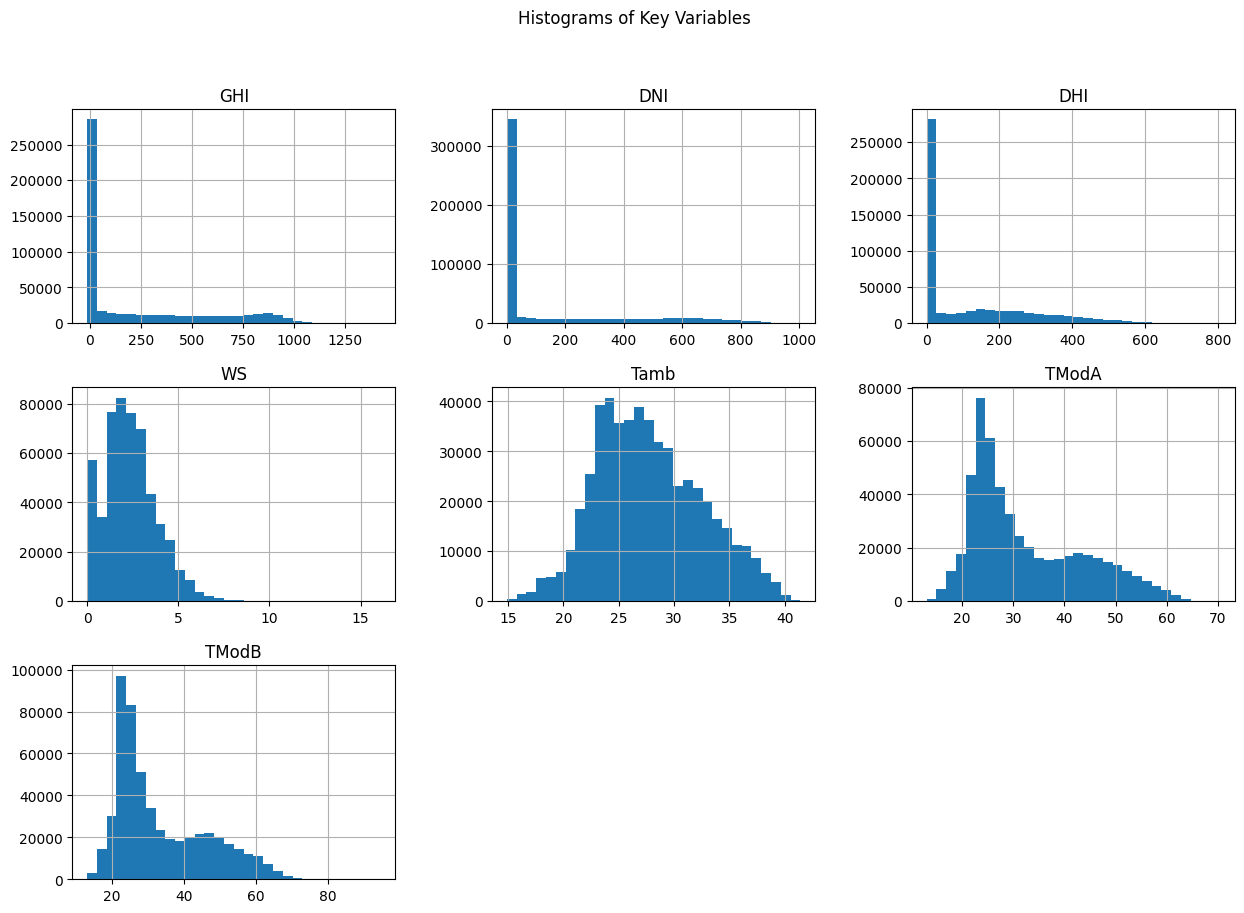

In [27]:
data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

## Z-Score Analysis

In [28]:
# Calculate Z-scores for GHI, DNI, DHI, Tamb
z_scores = data[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()} rows")

Outliers detected: 4714 rows


## Bubble chart for GHI vs Tamb vs WS with bubble size representing RH

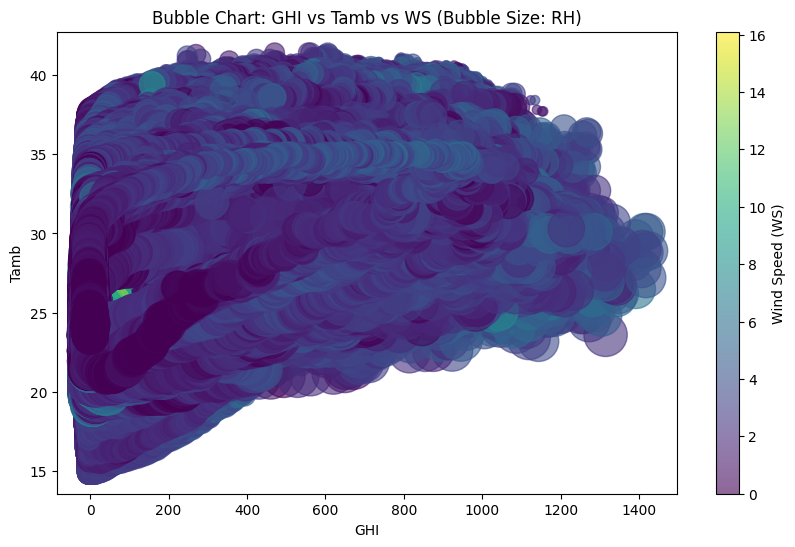

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis')
plt.colorbar(label='Wind Speed (WS)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb vs WS (Bubble Size: RH)')
plt.show()

## Data Cleaning: Handling anomalies and missing values

In [30]:
# Fill missing values with mean or a suitable value
data.fillna(data.mean(), inplace=True)

# Drop columns with all null values like 'Comments'
data.drop(columns=['Comments'], inplace=True)

In [31]:
data.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
